FLIGHT PRICE PREDICTION


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [154]:
df = pd.read_csv("Copy of Flight_Fare.csv")

In [156]:
# Displaying the initial 5 rows of data set
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [158]:
# Getting an overview of total no of rows and columns in the data
df.shape

(10683, 11)

In [160]:
# Getting an overview of features and there data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [162]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [164]:
# Getting an overview of the dataset including all
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [166]:
# USING TRANSPOSE
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL ? BOM ? COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df.describe(include='O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL ? BOM ? COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [170]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [172]:
# getting unique values in dataset
for i in df.columns:
    print(f"The unique value in feature {i} is",df[i].unique(),)
    print("******************************************************")

The unique value in feature Airline is ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
******************************************************
The unique value in feature Date_of_Journey is ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
******************************************************
The unique value in feature Source is ['Bangl

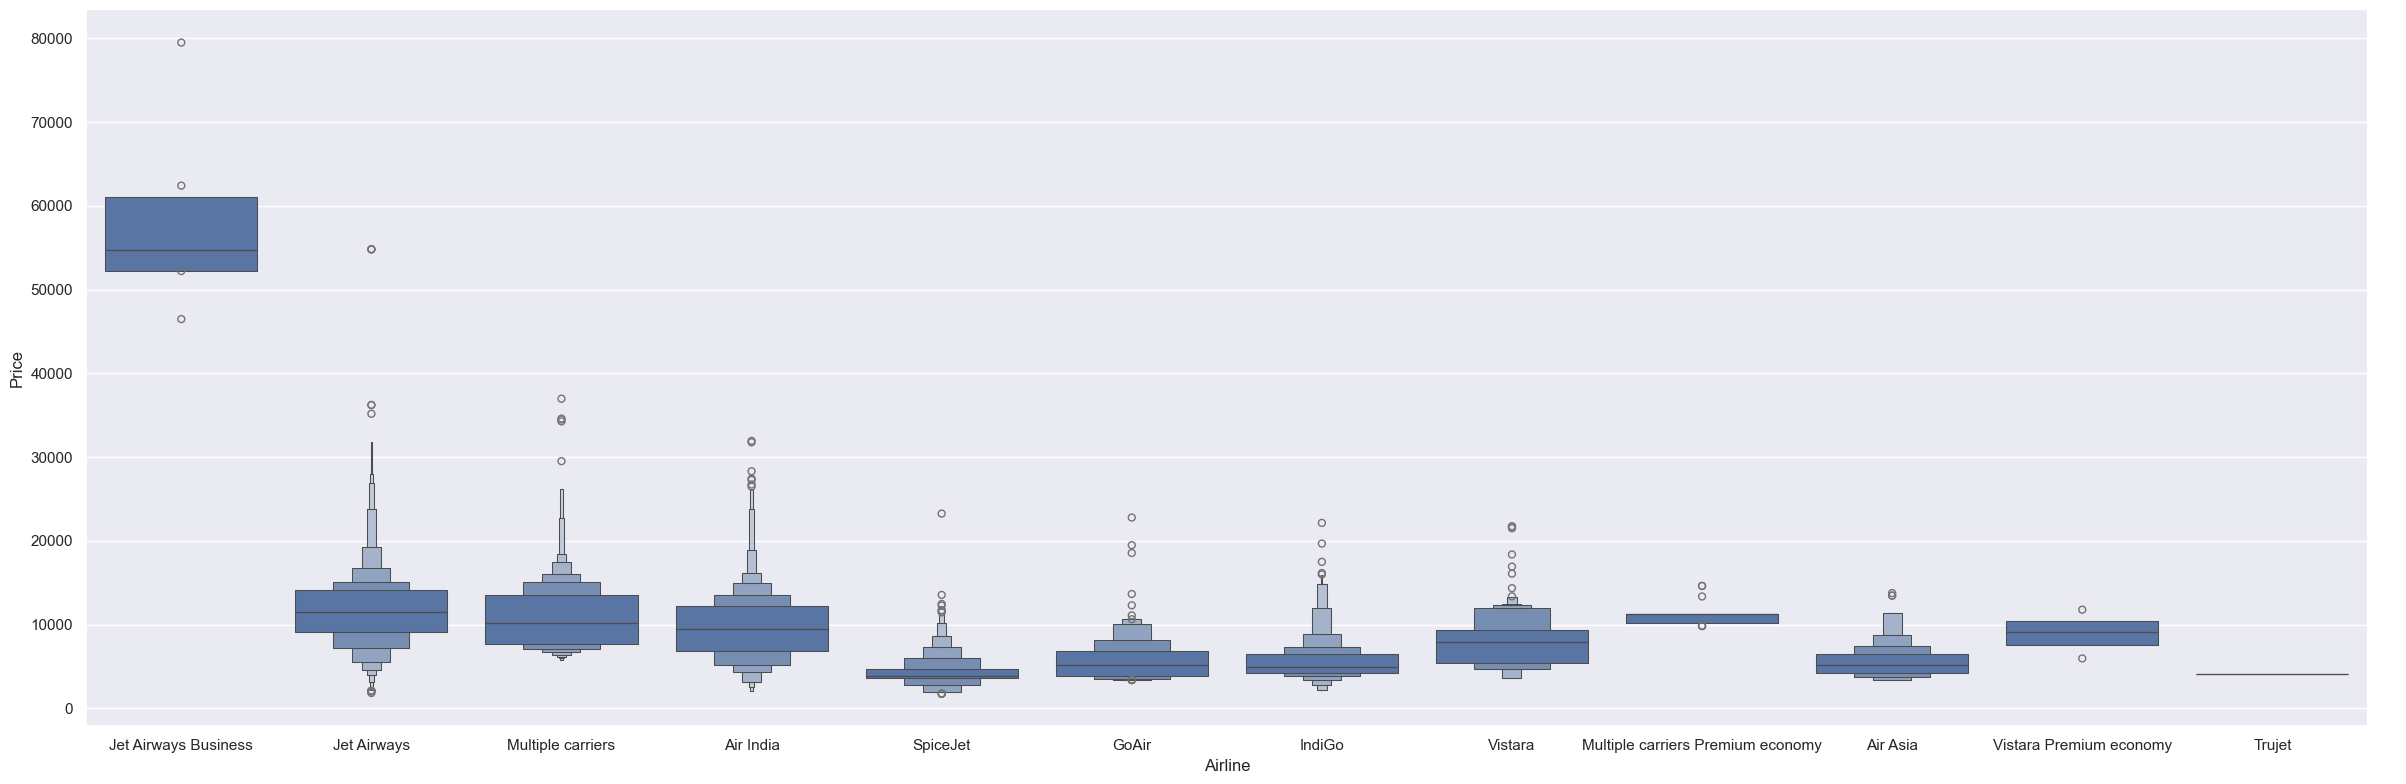

In [174]:
# plotting cat plot between price of flight and the airline and we can conclude that jet airways has more outliner in price

sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

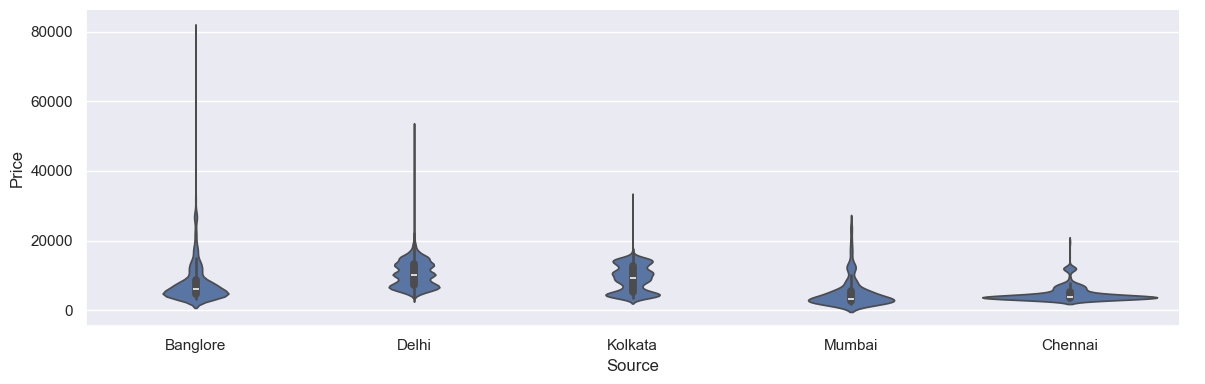

In [175]:
# plotting cat plot between price of flight and source  and we can conclude banglore has more outliner and chennai has least


sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

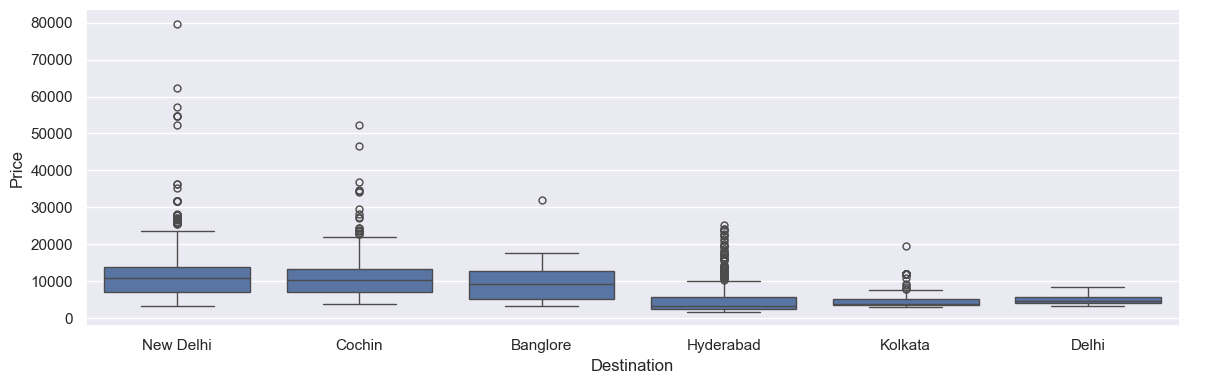

In [176]:
# plotting cat plot between price of flight and destination  and we can conclude new delhi has more outliner and kolkata has least

sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [180]:
 # Central Function to Prepare the Process data & Model data

def preprocess(data):
    """
    Function to Process data and get the process data & Modeling data
    """
    df.dropna(inplace = True)
    df.drop_duplicates(inplace = True)
    
    df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
    df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
    df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
    df['weekday'] = pd.DatetimeIndex(df['Date_of_Journey']).weekday
    
    df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0')
    df['Total_Stops'] = df['Total_Stops'].replace('1 stop', '1')
    df['Total_Stops'] = df['Total_Stops'].replace('2 stops', '2')
    df['Total_Stops'] = df['Total_Stops'].replace('3 stops', '3')
    df['Total_Stops'] = df['Total_Stops'].replace('4 stops', '4')

    
    df['Destination'] = np.where(df['Destination'] == 'New Delhi', 'Delhi', df['Destination'])
    df['Airline'] = np.where(df['Airline'] == 'Jet Airways Business','Jet Airways',df['Airline'])
    df['Airline'] = np.where(df['Airline'] == 'Vistara Premium economy','Vistara',df['Airline'])
    df['Airline'] = np.where(df['Airline'] == 'Multiple carriers Premium economy','Multiple carriers',df['Airline'])
    
    
    arrival_time = []
    for i in data["Arrival_Time"]:
        arrival_time.append(i[:5])
    df['Arrival_Time'] = arrival_time
    df['Arrival_Time_hour'] = pd.DatetimeIndex(df['Arrival_Time']).hour
    df['Arrival_Time_minutes'] = pd.DatetimeIndex(df['Arrival_Time']).minute
    
    df['Duration_Total_Hour'] = df['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)
    
    data1 = pd.get_dummies(data, prefix=['Airline','Source','Destination'],columns = ['Airline','Source','Destination'], drop_first = True)
    data1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Additional_Info','Route'], axis =1, inplace = True)
    return data, data1


In [182]:
df.shape

(10683, 11)

In [184]:
### Get The EDA & Model Data
data_eda, data_model = preprocess(df)

In [185]:
data_eda

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Duration_Total_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,BLR ? DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,6,1,10,2.833333
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2,13,15,7.416667
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2,No info,13882,9,6,6,4,25,19.000000
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,6,23,30,5.416667
4,IndiGo,2019-03-01,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,4,21,35,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,0,No info,4107,9,4,1,22,25,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,0,No info,4145,27,4,5,23,20,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,0,No info,7229,27,4,5,11,20,3.000000
10681,Vistara,2019-03-01,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,0,No info,12648,1,3,4,14,10,2.666667


In [186]:
data_model

,Duration,Total_Stops,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Duration_Total_Hour,Airline_Air India,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2h 50m,0,3897,24,3,6,1,10,2.833333,False,...,False,False,False,False,False,False,False,True,False,False
1,7h 25m,2,7662,1,5,2,13,15,7.416667,True,...,False,False,False,False,True,False,False,False,False,False
2,19h,2,13882,9,6,6,4,25,19.000000,False,...,False,False,False,True,False,False,True,False,False,False
3,5h 25m,1,6218,12,5,6,23,30,5.416667,False,...,False,False,False,False,True,False,False,False,False,False
4,4h 45m,1,13302,1,3,4,21,35,4.750000,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,9,4,1,22,25,2.500000,False,...,False,False,False,False,True,False,False,False,False,False
10679,2h 35m,0,4145,27,4,5,23,20,2.583333,True,...,False,False,False,False,True,False,False,False,False,False
10680,3h,0,7229,27,4,5,11,20,3.000000,False,...,False,False,False,False,False,False,False,True,False,False
10681,2h 40m,0,12648,1,3,4,14,10,2.666667,False,...,False,True,False,False,False,False,False,True,False,False


In [187]:
# Now there is no null value in data
df.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             0
Additional_Info         0
Price                   0
day                     0
month                   0
weekday                 0
Arrival_Time_hour       0
Arrival_Time_minutes    0
Duration_Total_Hour     0
dtype: int64

Univariate Exploratory Data Analysis


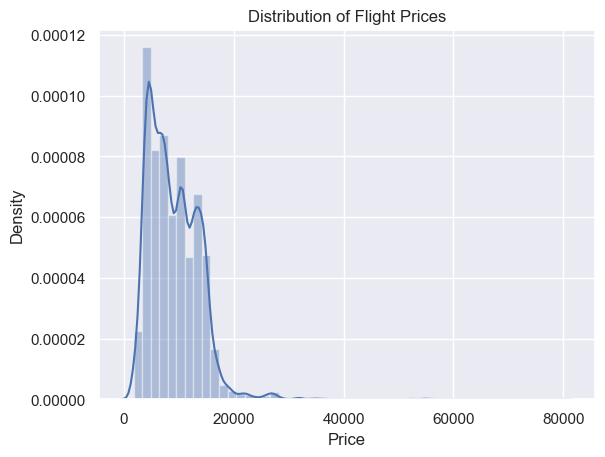

In [192]:
# Histogram for 'price'
sns.distplot(data_eda['Price'])
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

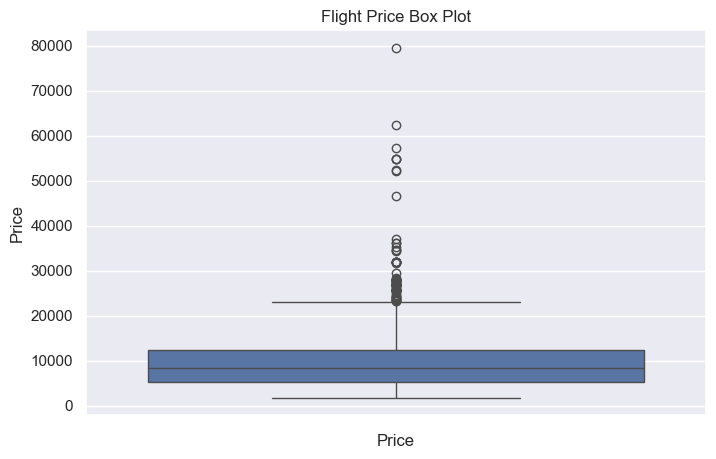

In [194]:
# Create a box plot to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data_eda['Price'])
plt.title("Flight Price Box Plot")
plt.xlabel("Price")
plt.show()

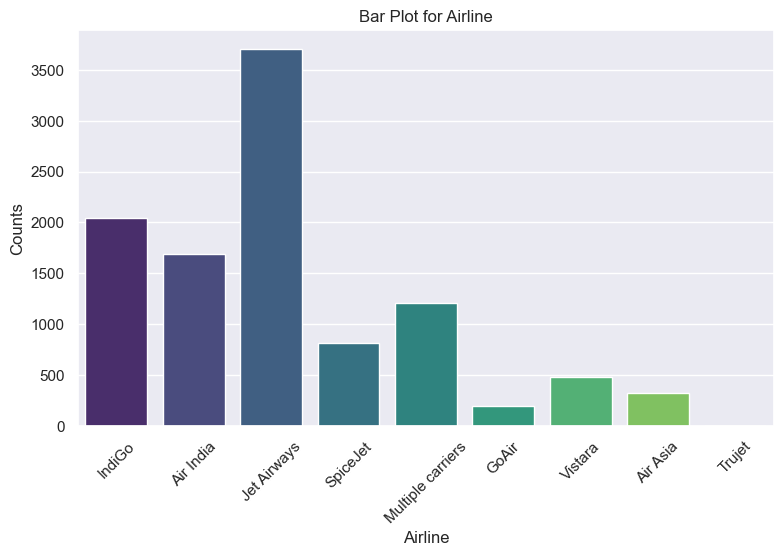

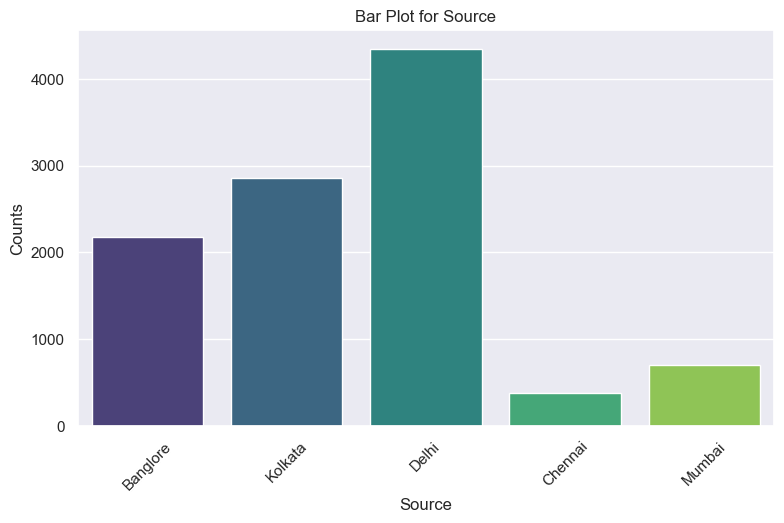

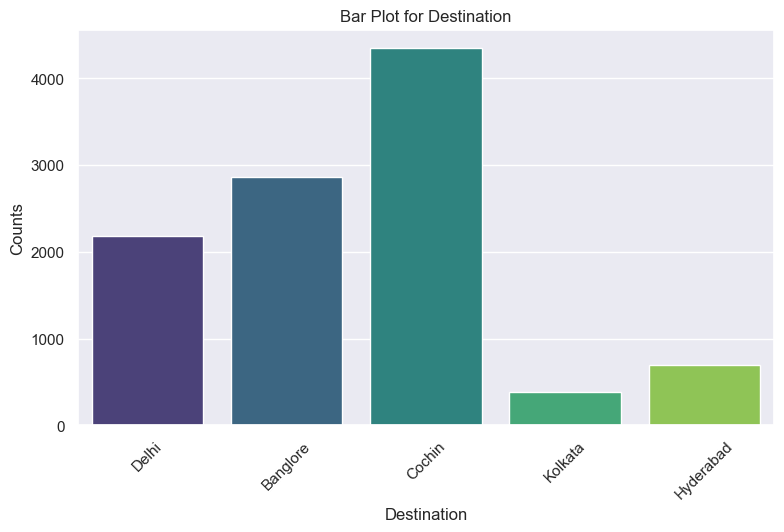

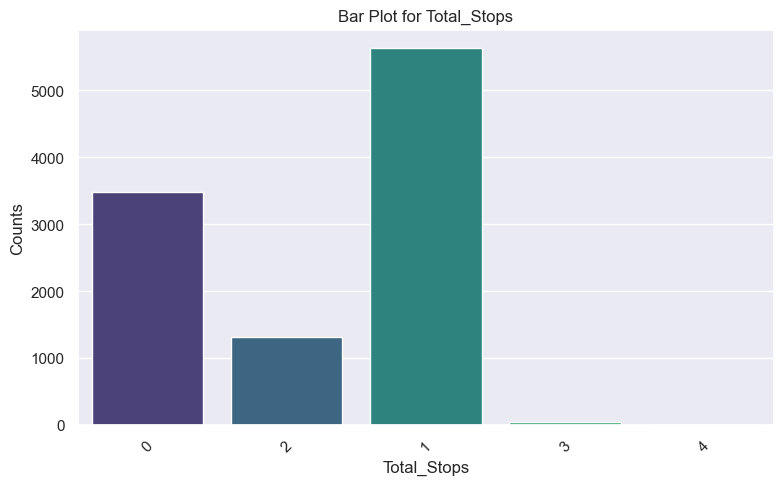

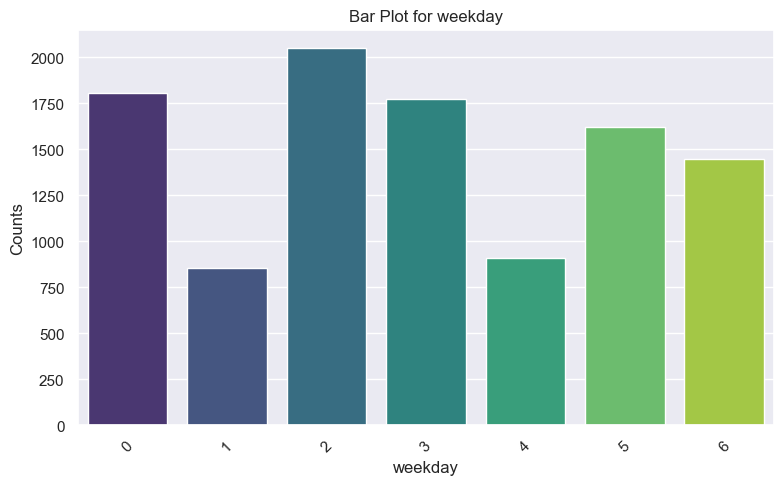

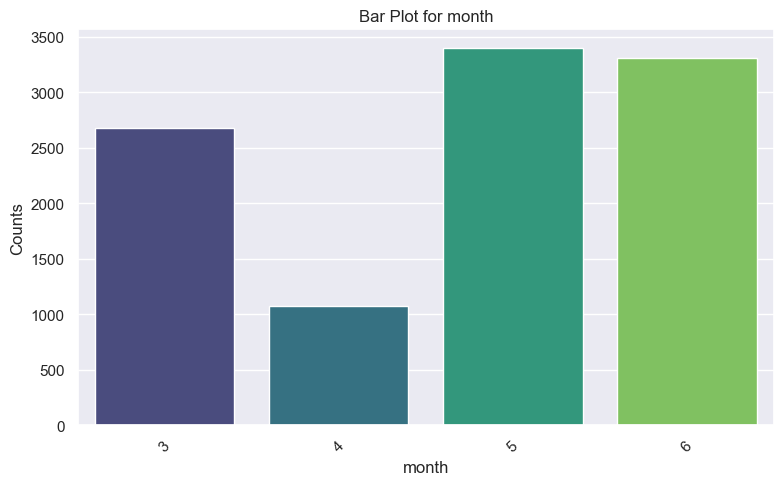

In [195]:
#Airline	Date_of_Journey	Source	Destination	Route	Dep_Time	Arrival_Time	Duration	Total_Stops	Additional_Info	Price	day	month	weekday	Arrival_Time_hour	Arrival_Time_minutes	Duration_Total_Hour
seg_data = ['Airline','Source','Destination','Total_Stops','weekday','month']
for edcol in seg_data:
    plt.figure(figsize=(8, 5))
    # Creating a count plot using seaborn
    sns.countplot(x=data_eda[edcol], palette="viridis")
    
    plt.xlabel(edcol)
    plt.ylabel('Counts')
    plt.title(f'Bar Plot for {edcol}')
    
    # Adjust layout for better visualization
    plt.tight_layout()
    plt.xticks(rotation=45)
    # Display the plot
    plt.show()

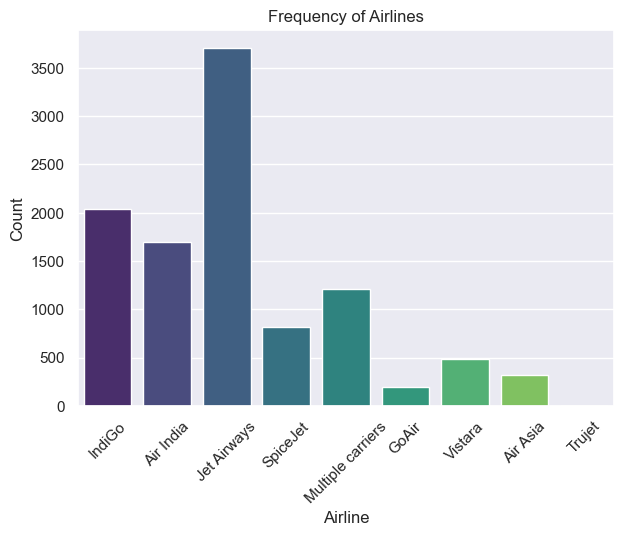

In [197]:
# Univariate EDA for categorical variables

# Count plot for 'airline'
sns.countplot(x=data_eda['Airline'], palette="viridis")
plt.title('Frequency of Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

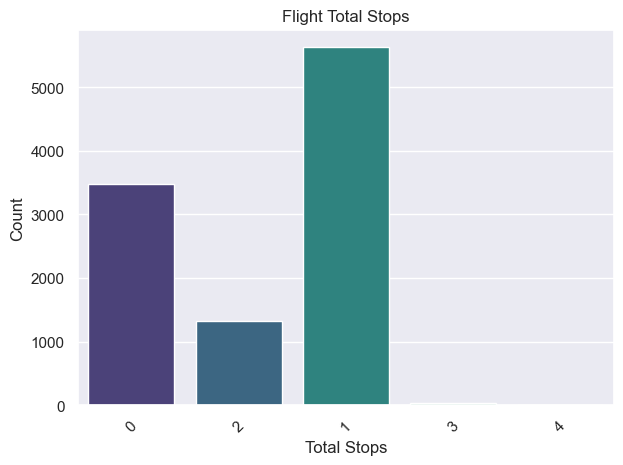

In [198]:
# Univariate EDA for categorical variables

# Count plot for 'Source'
sns.countplot(x=data_eda['Total_Stops'], palette="viridis")
plt.title('Flight Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

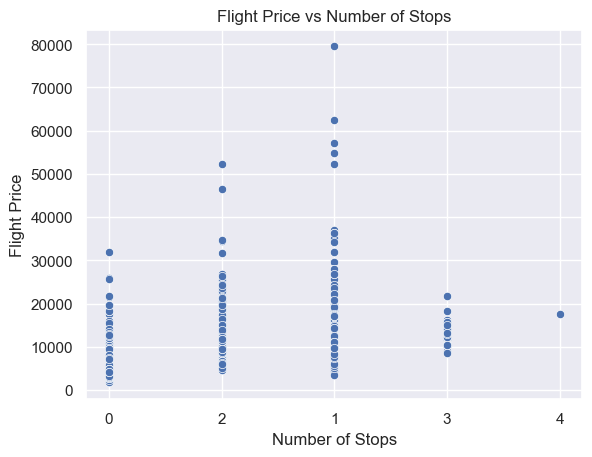

In [199]:
#relationship between the flight price and the number of stops.
sns.scatterplot(x='Total_Stops', y='Price', data=data_eda)
plt.xlabel('Number of Stops')
plt.ylabel('Flight Price')
plt.title('Flight Price vs Number of Stops')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Average Flight Price by Airline')

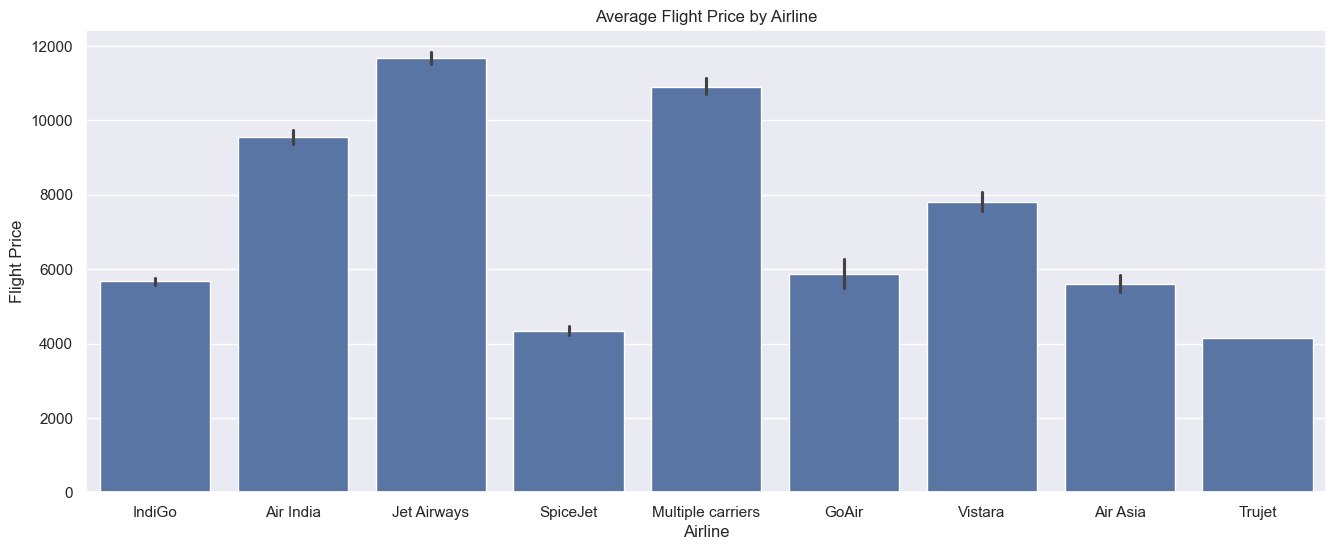

In [200]:
# Average Price Duistrubution as per airline
plt.figure(figsize=(16,6))
sns.barplot(x="Airline",y='Price',data=data_eda)
plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.title('Average Flight Price by Airline')

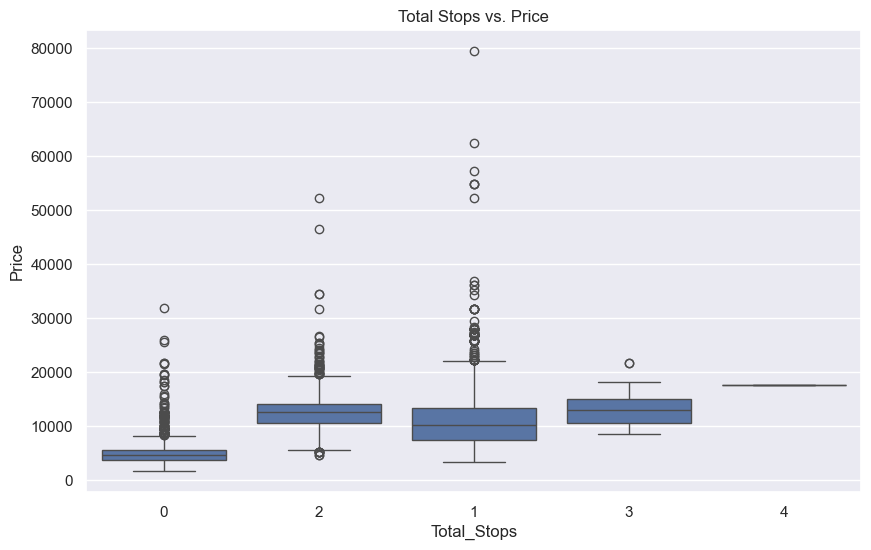

In [201]:
# Example 3: Total Stops vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data_eda)
plt.title('Total Stops vs. Price')
plt.show()

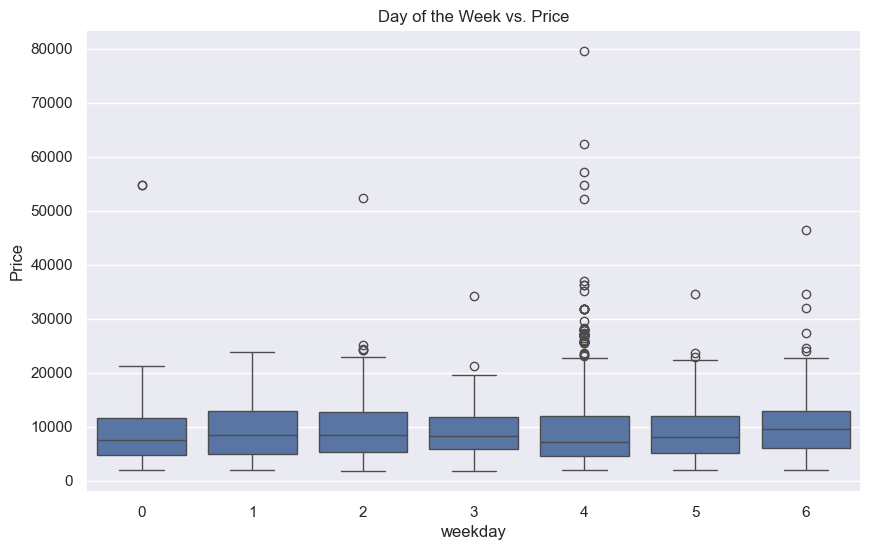

In [202]:
# Example 4: Day of the Week vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='Price', data=data_eda)
plt.title('Day of the Week vs. Price')
plt.show()

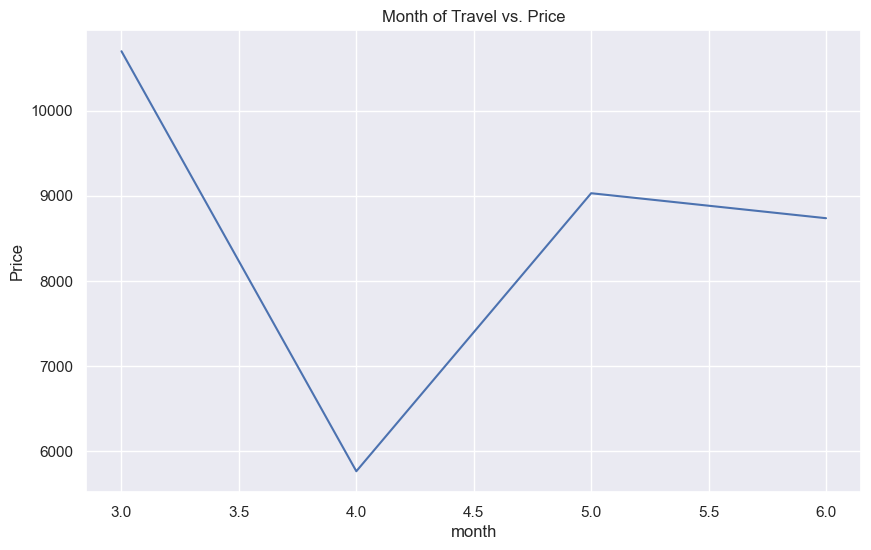

In [203]:
# Example 5: Month of Travel vs. Price
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Price', data=data_eda, estimator='mean', ci=None)
plt.title('Month of Travel vs. Price')
plt.show()

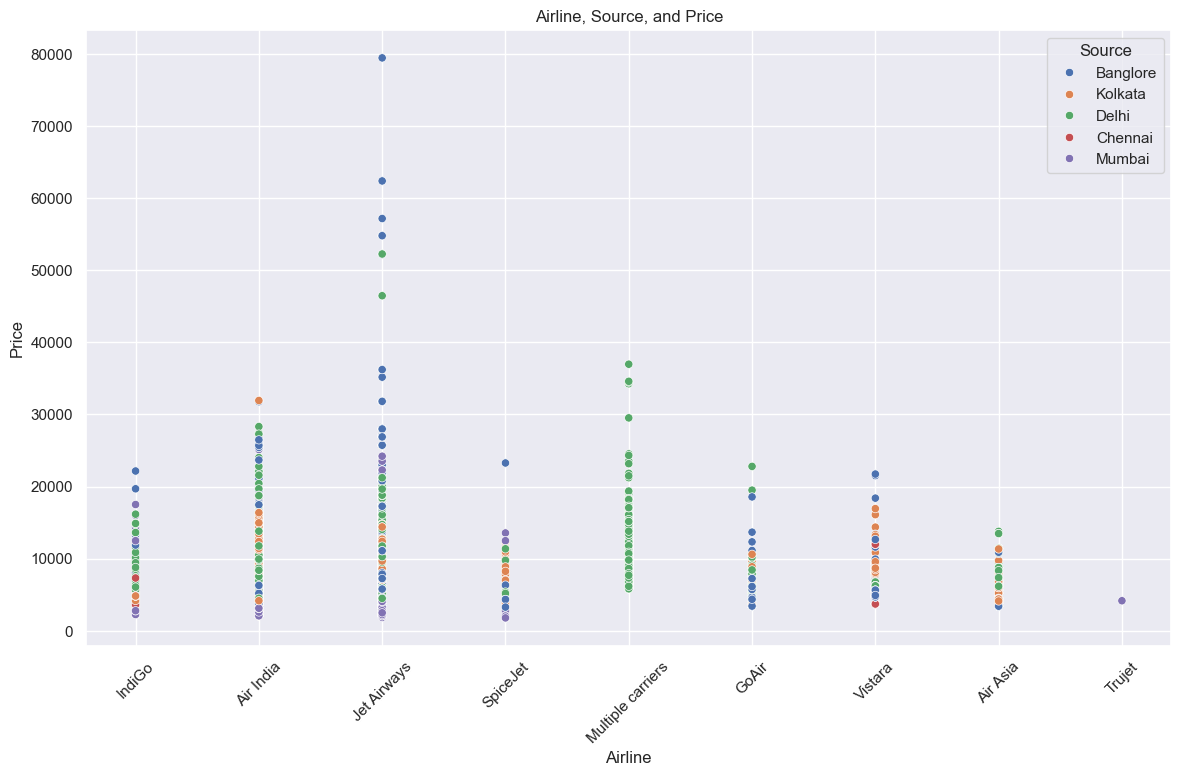

In [204]:
# Airline, Source, and Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Airline', y='Price', hue='Source', data=data_eda)
plt.xticks(rotation=45)
plt.title('Airline, Source, and Price')
plt.show()

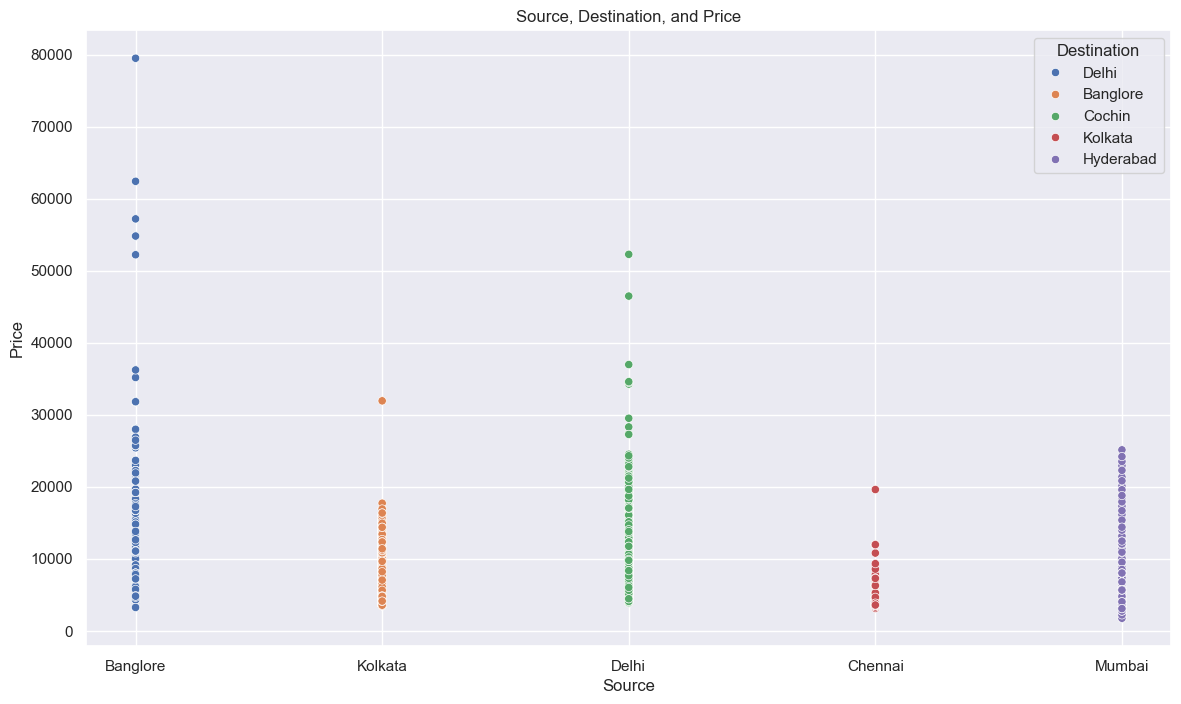

In [205]:
#Source, Destination, and Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Source', y='Price', hue='Destination', data=data_eda)
plt.title('Source, Destination, and Price')
plt.show()

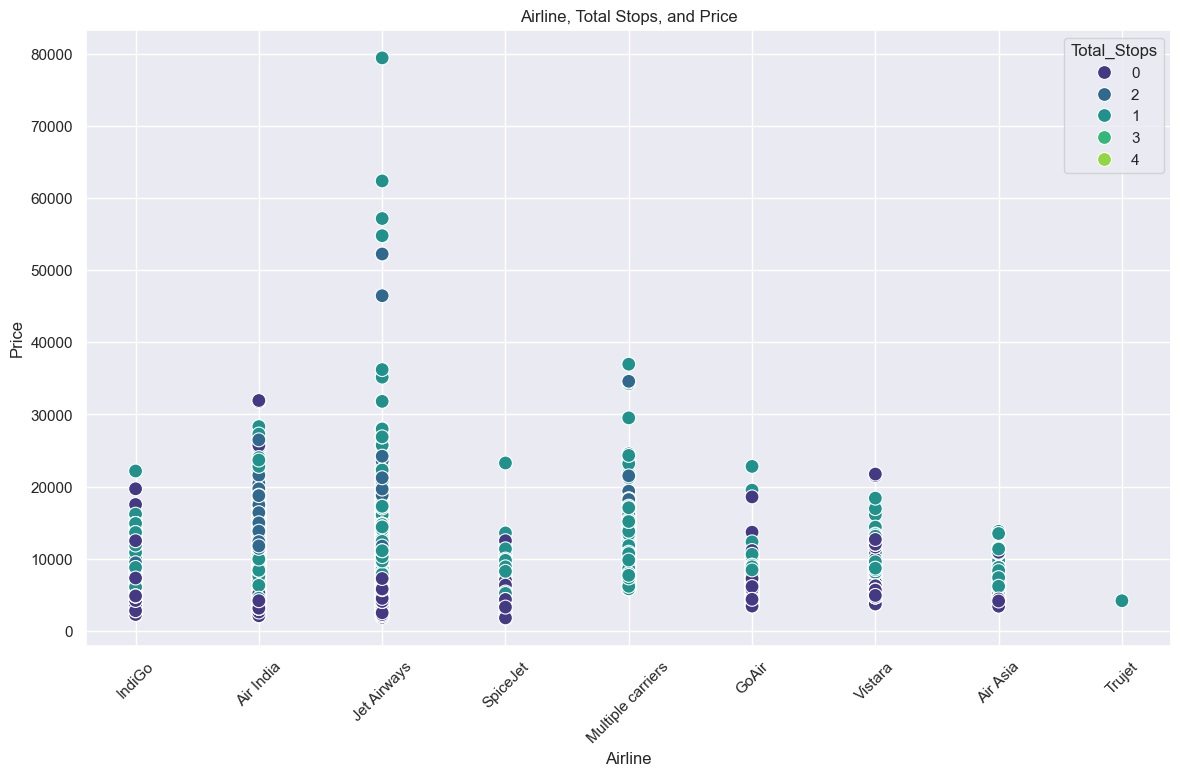

In [206]:
#  Airline, Total Stops, and Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Airline', y='Price', hue='Total_Stops', data=data_eda, palette='viridis', s=100)
plt.xticks(rotation=45)
plt.title('Airline, Total Stops, and Price')
plt.show()

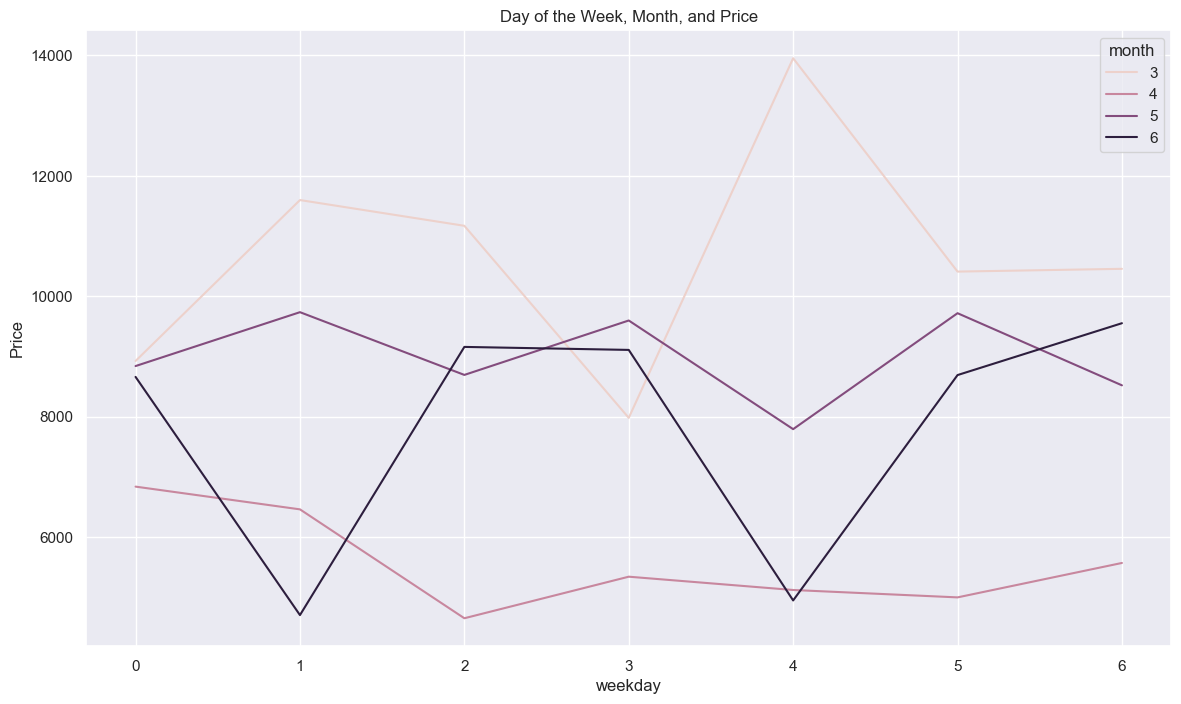

In [207]:
#  Day of the Week, Month, and Price
plt.figure(figsize=(14, 8))
sns.lineplot(x='weekday', y='Price', hue='month', data=data_eda, estimator='mean', ci=None)
plt.title('Day of the Week, Month, and Price')
plt.show()

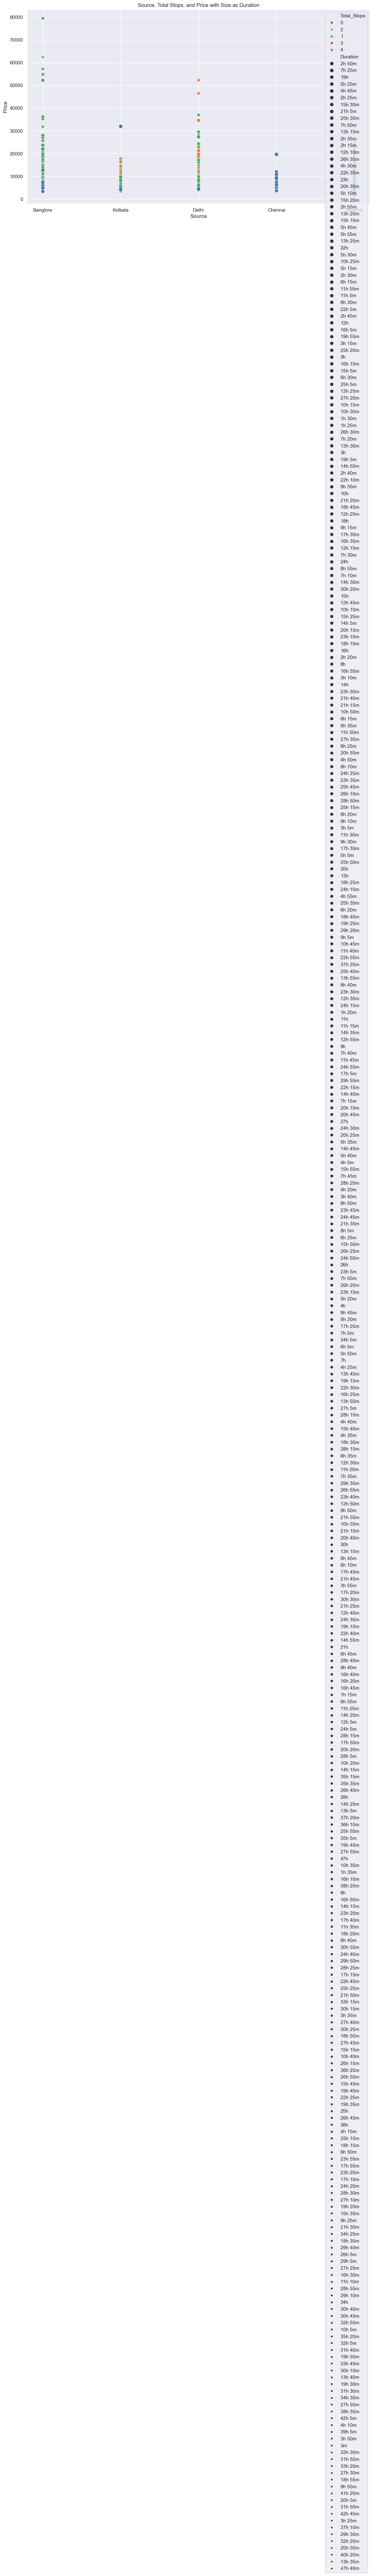

In [208]:
#  Source, Total Stops, and Price with Size as Duration
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Source', y='Price', hue='Total_Stops', size='Duration', data=data_eda)
plt.title('Source, Total Stops, and Price with Size as Duration')
plt.show()

In [209]:
data_eda.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day', 'month', 'weekday',
       'Arrival_Time_hour', 'Arrival_Time_minutes', 'Duration_Total_Hour'],
      dtype='object')

In [210]:
X = data_model.drop(['Price','Duration'],axis=1)
y = data_model['Price']

MODELING



In [212]:
from sklearn.model_selection import train_test_split

In [213]:
# SPLITING THE DATA
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

FEATURE SELECTION

In [215]:
from sklearn.ensemble import ExtraTreesRegressor
extractor = ExtraTreesRegressor()
# using extratreesregressor we can find the important feature for model

In [217]:
extractor.fit(X_train,y_train)

ExtraTreesRegressor()

In [218]:
x_columns = X_train.columns
feature_rank = pd.DataFrame({'feature':x_columns, 'importance':extractor.feature_importances_})

In [219]:
feature_rank = feature_rank.sort_values('importance',ascending =  False)

<Axes: xlabel='importance', ylabel='feature'>

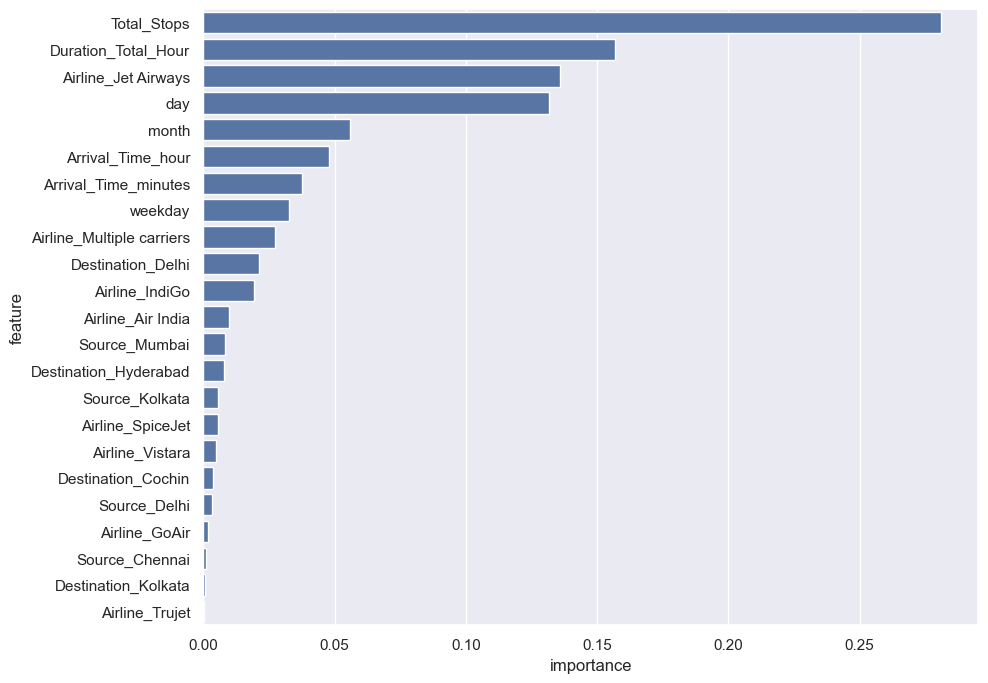

In [220]:
plt.figure(figsize=(10,8))
sns.barplot(x='importance',y='feature',data=feature_rank)

# total stop is most imp feature and it affect the price most

In [222]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum()*100

In [223]:
feature_rank.head(15)

,feature,importance,cumsum
0,Total_Stops,0.281124,28.112442
6,Duration_Total_Hour,0.156690,43.781394
10,Airline_Jet Airways,0.135947,57.376064
1,day,0.131777,70.553800
2,month,0.055852,76.139048
4,Arrival_Time_hour,0.047897,80.928775
5,Arrival_Time_minutes,0.037635,84.692243
3,weekday,0.032531,87.945325
11,Airline_Multiple carriers,0.027381,90.683462
20,Destination_Delhi,0.021229,92.806397


MODEL BUILDING

In [226]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [227]:
def predict(ml_model):
    print('Model name is: {}'.format(ml_model))
    model = ml_model.fit(X_train,y_train)
    print("Training Score: {}".format(model.score(X_train,y_train)))
    
    predictions = model.predict(X_test)
    
    r2score = r2_score (y_test,predictions)
    print('R2 Score is: {}'.format(r2score))   

    
    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

In [229]:
predict(LinearRegression())

Model name is: LinearRegression()
Training Score: 0.5611562109363095
R2 Score is: 0.5713845353463042
MAE: 2025.9914576792792
MSE: 8936750.897874987
RMSE: 2989.4398970166612


In [230]:
predict(DecisionTreeRegressor())

Model name is: DecisionTreeRegressor()
Training Score: 0.969740512514991
R2 Score is: 0.6518063725486032
MAE: 1481.6622471731166
MSE: 7259933.365387932
RMSE: 2694.4263518210946


In [231]:
predict(RandomForestRegressor())

Model name is: RandomForestRegressor()
Training Score: 0.9514978428639196
R2 Score is: 0.7909726432596209
MAE: 1239.5058847879175
MSE: 4358278.15858046
RMSE: 2087.6489548246514


In [232]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[100,200,300,400,500], 'max_features' : ['auto','sqrt'], 'max_depth' : [5,10,15,20]}
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(rf,params,cv=10,verbose = True, n_jobs=-1)
rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=True)

In [233]:
rf_cv.best_params_

{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 15}

In [234]:
predict(RandomForestRegressor(n_estimators = 400, max_features = 'sqrt',max_depth = 15))

Model name is: RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=400)
Training Score: 0.9213877164961879
R2 Score is: 0.7962149931460123
MAE: 1311.343695042772
MSE: 4248973.714579506
RMSE: 2061.303887004414
